In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [79]:
# Reading the data
data = pd.read_csv('../tmdb-box-office-prediction/train.csv')

In [80]:
# look at first to view entries for overview
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [81]:
# Get main information about dataset
data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [82]:
# Look at correlations
data.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


## Investigating feature 'popularity'

### Check for potentially corrupted data

In [83]:
len(data)

3000

In [84]:
len(data[data.popularity.isna()])

0

In [85]:
len(data[data.popularity == 0])

0

In [86]:
len(data[data.revenue == 0])

0

In [87]:
len(data[data.revenue.isna()])

0

In [88]:
len(data[data.revenue < 10000])

92

In [89]:
data_cleaned = data[data.revenue >= 10000]

* Insights
    * It is unclear where popularity values stem from so it is hard to say data they make much sense or not
    * However, at least there are no zeros and no nans, min and max are not too small or too big, so it seems reasonable to use all values
    * A revenue of less than 10000 US-Dollar seems unlikely, so I ignore these data in the following steps.

### Try to find linear relationship to revenue (potentially using transformations)

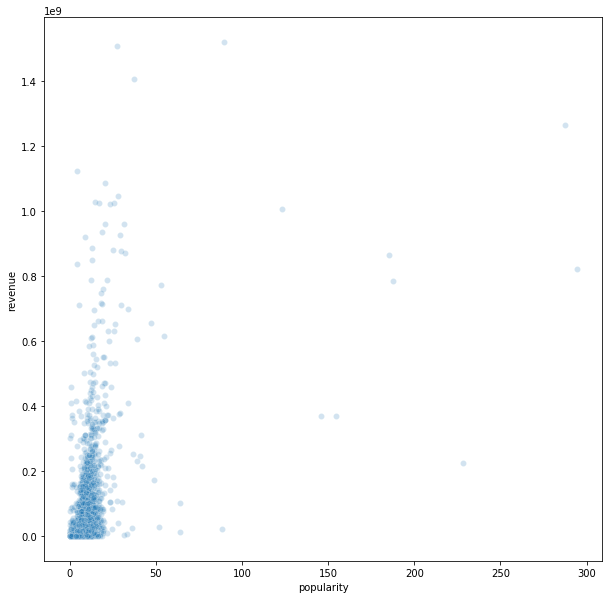

In [90]:
# draw scatterplot
plt.figure(figsize=(10,10))
sns.scatterplot(x='popularity', y='revenue', data=data_cleaned, alpha=0.2)

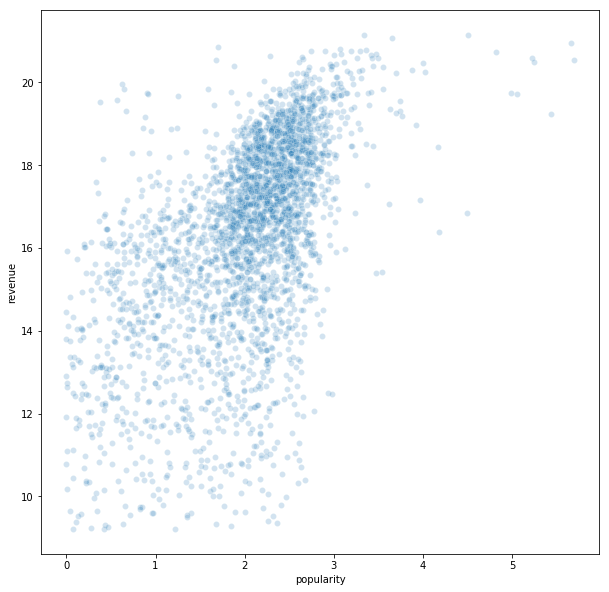

In [91]:
# playing around with logarithms, closest to linear seems log1p(popularity) vs log(revenue)
plt.figure(figsize=(10,10))
sns.scatterplot(x=np.log1p(data_cleaned.popularity), y=np.log(data_cleaned.revenue), alpha=0.2)

In [92]:
# identify linear model for log1p-log relationsship
linModel = LinearRegression()
x = np.log1p(data_cleaned[['popularity']])
y = np.log1p(data_cleaned['revenue'])
linModel.fit(x,y)
y_pred = linModel.predict(x)

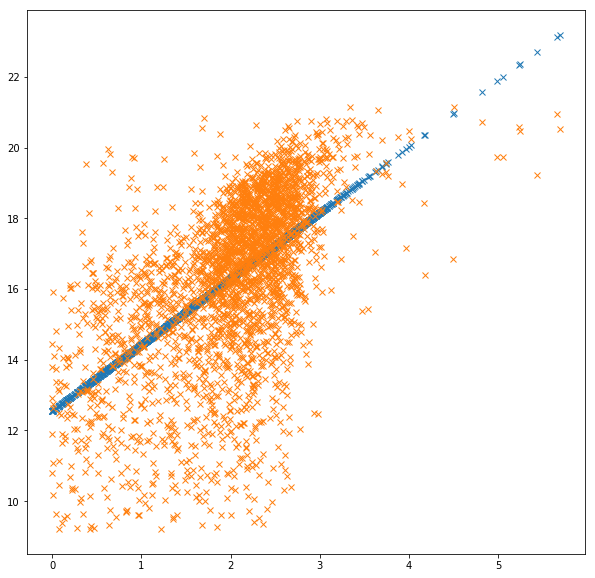

In [93]:
# plot data vs. prediction
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,y_pred,'x',x,y,'x')

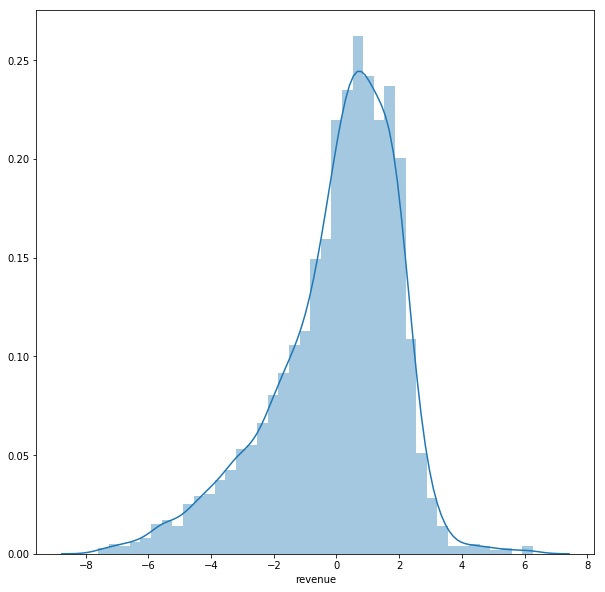

In [94]:
# plot distribution of residuals (desire: should be normally distributed)
plt.figure(figsize=(10,10))
sns.distplot(y-y_pred)

* Insights:
    * Native data does not show linear relationship
    * Tried only logarithmic transformations
    * log-log seems to be closest to linear at first sight, disadvantage: had to transform the target variable which would affect relation to all other features, too, if we seriously tried an overall linear approach
    * Comparing prediction to transformed data indicates that linear model is potentially distored by data samples with high popularity, it might be worth to find out if these could be outliers
    * Distribution of residuals is not really normal, but could be close enough
    
    

### Further plots: Box(en)plot and Violin

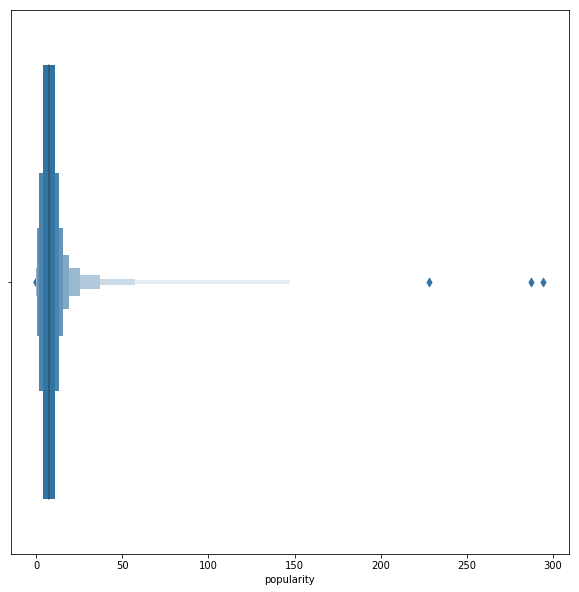

In [95]:
plt.figure(figsize=(10,10))
sns.boxenplot(data.popularity)

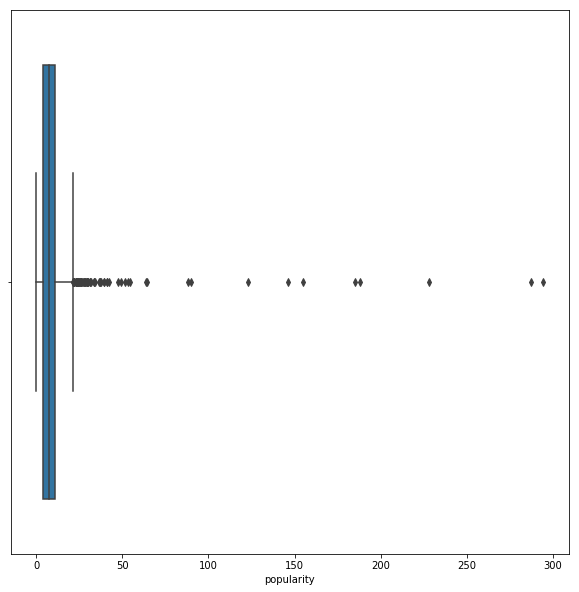

In [96]:
plt.figure(figsize=(10,10))
sns.boxplot(data.popularity)

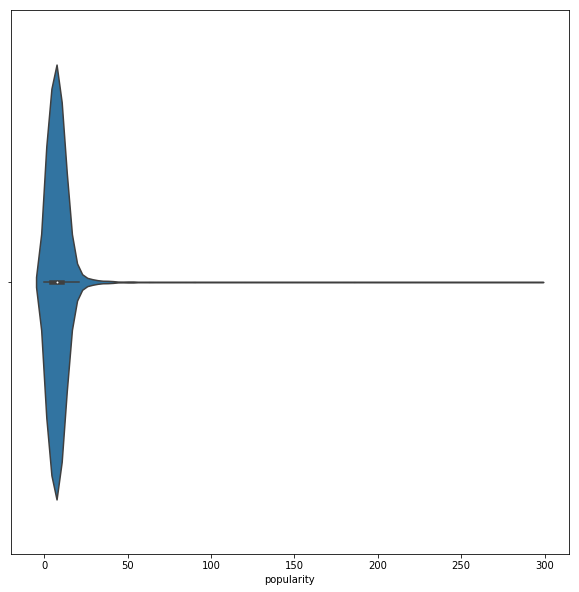

In [97]:
plt.figure(figsize=(10,10))
sns.violinplot(data.popularity)